In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "/content/Social_Network.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
#a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables

In [ ]:
x=df.iloc[:, 1:-1].values
print(x[0:10])

[[    0    26 43000]
 [    0    27 57000]
 [    0    27 84000]
 [    0    35 65000]
 [    0    26 80000]
 [    0    26 52000]
 [    0    21 16000]
 [    0    28 44000]
 [    0    33 28000]
 [    0    26 72000]]


In [ ]:
#b. Use the target variable as 'Purchased' (Yes-Y, No-N)

In [64]:
y = df.iloc[:, 4].values
print(y[0:-1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#c. Encode the categorical value of the target column to numerical value

In [58]:
df['Purchased']= df['Purchased'].replace({'Yes':1, 'No':0})
df['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
#d. Divide the data into training (75%) and testing set (25%)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)


In [75]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)


In [ ]:
#e. Perform the classification with K=3

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [77]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [ ]:
#f. Analyse the performance of the classifier with various performance measures such as confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating
#characteristic (ROC) curve and Area Under Curve (AUC) score. 

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [79]:
# Calculate specificity, recall, precision and F1-score
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

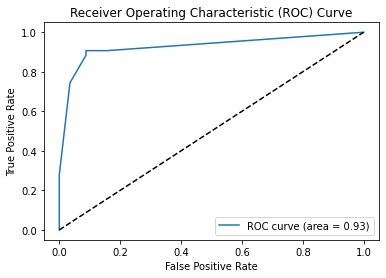

In [80]:
# Plot ROC curve and calculate AUC score
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#g. Perform feature scaling on independent variables and analyse the performance

In [85]:
X= df.iloc[:, [3,4]].values

In [86]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [90]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


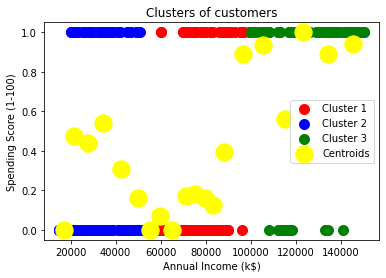

In [91]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#h. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained. K value TP TN Accuracy f-score AUC score

In [92]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [94]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [95]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

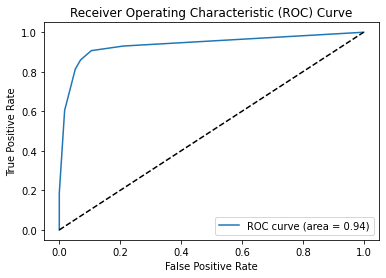

In [96]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [97]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [98]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [100]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

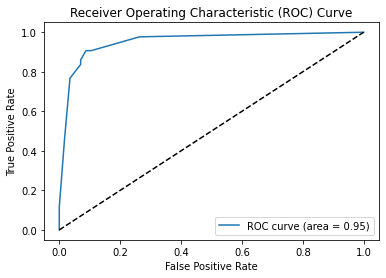

In [101]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [102]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [103]:
y_pred =knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [104]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [105]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

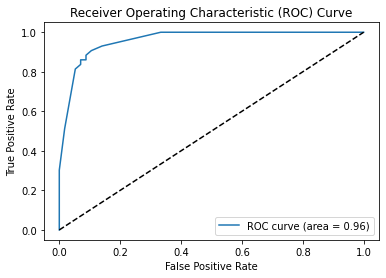

In [106]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#i. Analyse for which K value, the classification algorithm provides better performance.

In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 0.1
Mean squared error: 0.1
variance score: 0.5920032639738881
Root Mean Squared Error: 0.31622776601683794
